In [1]:
import matplotlib.pyplot as plt

In [2]:
import numpy as np

In [3]:
import pandas as pd

In [4]:
import random

In [5]:
pip install -U scikit-learn

Requirement already up-to-date: scikit-learn in c:\users\francesca\anaconda3\envs\tensorflow\lib\site-packages (0.23.2)Note: you may need to restart the kernel to use updated packages.



In [6]:
import sklearn

In [7]:
from sklearn import datasets, linear_model

In [8]:
train_input=pd.read_table('C:\\Users\\Francesca\\Documents\\special course\\henriette\\train_total_adjusted_input.txt')
train_target=pd.read_table('C:\\Users\\Francesca\\Documents\\special course\\henriette\\train_total_adjusted_target.txt')
test_input=pd.read_table('C:\\Users\\Francesca\\Documents\\special course\\henriette\\test_total_adjusted_input.txt')
test_target=pd.read_table('C:\\Users\\Francesca\\Documents\\special course\\henriette\\test_total_adjusted_target.txt')

In [9]:
train_input.head()

,tanb0,tanb1,tanb2,adim_d1,adim_d2,adim_H
0,0.04,0.01,0.01,0.0,5200.0,0.000001
1,0.10,0.01,0.01,0.0,5200.0,0.000001
2,0.13,0.01,0.01,0.0,5200.0,0.000001
3,0.01,0.05,0.05,0.0,5200.0,0.000001
4,0.07,0.05,0.05,0.0,5200.0,0.000001


In [10]:
test_input.head()

,tanb0,tanb1,tanb2,adim_d1,adim_d2,adim_H
0,0.01,0.01,0.01,0.0,5200.0,0.000001
1,0.07,0.01,0.01,0.0,5200.0,0.000001
2,0.04,0.05,0.01,0.0,5200.0,0.000001
3,0.10,0.05,0.01,0.0,5200.0,0.000001
4,0.13,0.10,0.01,0.0,5200.0,0.000001


In [11]:
train_target.head()

,adim_R
0,5.116
1,7.558
2,6.946
3,0.060
4,5.436


In [12]:
test_target.head()

,adim_R
0,1.110
1,7.324
2,2.920
3,6.224
4,4.120


In [13]:
train_input.describe()

,tanb0,tanb1,tanb2,adim_d1,adim_d2,adim_H
count,53125.000000,53125.000000,53125.000000,53125.000000,53125.000000,5.312500e+04
mean,0.070033,0.102037,0.102087,579.491451,4868.721443,9.131220e-07
std,0.042431,0.067946,0.067929,502.427727,2453.797581,1.078997e-06
min,0.010000,0.010000,0.010000,0.000000,1733.333333,8.006097e-08
25%,0.040000,0.050000,0.050000,200.000000,3333.333333,2.134959e-07
50%,0.070000,0.100000,0.100000,500.000000,4200.000000,4.269919e-07
75%,0.100000,0.150000,0.150000,800.000000,5800.000000,9.607317e-07
max,0.130000,0.200000,0.200000,2000.000000,11600.000000,3.842927e-06


In [14]:
training=pd.read_table('C:\\Users\\Francesca\\Documents\\special course\\henriette\\train_total_adjusted_i+t.txt')

In [15]:
testing=pd.read_table('C:\\Users\\Francesca\\Documents\\special course\\henriette\\test_total_adjusted_i+t.txt')

In [16]:
training.head()

,tanb0,tanb1,tanb2,adim_d1,adim_d2,adim_H,adim_R
0,0.04,0.01,0.01,0.0,5200.0,0.000001,5.116
1,0.10,0.01,0.01,0.0,5200.0,0.000001,7.558
2,0.13,0.01,0.01,0.0,5200.0,0.000001,6.946
3,0.01,0.05,0.05,0.0,5200.0,0.000001,0.060
4,0.07,0.05,0.05,0.0,5200.0,0.000001,5.436


In [17]:
testing.head()

,tanb0,tanb1,tanb2,adim_d1,adim_d2,adim_H,adim_R
0,0.01,0.01,0.01,0.0,5200.0,0.000001,1.110
1,0.07,0.01,0.01,0.0,5200.0,0.000001,7.324
2,0.04,0.05,0.01,0.0,5200.0,0.000001,2.920
3,0.10,0.05,0.01,0.0,5200.0,0.000001,6.224
4,0.13,0.10,0.01,0.0,5200.0,0.000001,4.120


In [18]:
training.shape


(53125, 7)

In [19]:
testing.shape

(9375, 7)

In [20]:
regr=linear_model.LinearRegression()

In [21]:
lfit=regr.fit(train_input, train_target)

In [22]:
print('Coefficients: \n', regr.coef_)

Coefficients: 
 [[ 4.34854309e+00 -2.19433837e+01 -3.14580692e+00 -7.58107919e-04
   1.78478011e-04  3.09646528e+05]]


In [23]:
prediction_of_test=regr.predict(test_input).squeeze()

In [24]:
rows = len(test_target)
print(rows)

9375


In [25]:
test = 0 #initialising
prediction = 0 #initialising
diff = [] #initialising
mse = 0 #initialising
#sum=0
for i in range(rows): #looping through all entries
    test = test_target['adim_R'][i] #taking the test_target value for "adim_R" in row i
    prediction = prediction_of_test[i] #taking the test prediction corresponding to row i
    diff.append((test - prediction)**2) #calculating all 2norms and normalising by number of rows
mse=sum(diff)/rows #summing all 2norms and normalising by number of rows
print("MSE", mse) #print the MSE

MSE 1.7443285474797126


In [28]:
print(diff)

[23.97496121185861, 1.1165390342863402, 5.471595832557286, 0.4955359760810221, 0.18778697419139984, 2.6140612564774846, 0.7296145185693891, 0.04736573111420614, 0.1718072518156459, 15.254387014399434, 1.9113541167291583, 0.2694916544050242, 0.4821860149648846, 2.1629327922674273, 1.7380628881513285, 0.25089499414703986, 4.796377609354331, 4.670572758472739, 6.891846024877391, 5.230298767412062, 4.7073658346514655, 1.5346642457395994, 3.279349514505476, 1.9166772723992485, 8.78155789727282, 0.5185300299191058, 0.10802035807270682, 0.04882375089205672, 3.3472544563056403, 1.4234734121869697, 0.040699828032169066, 1.0298787081372307, 0.3368329420537071, 6.951831139918546, 0.9154533196621281, 0.1281125271044647, 7.495763901520164e-05, 0.10945023399099894, 5.926984459664903, 1.185825998219811, 3.236234766126771, 0.9103506672880963, 0.011944778197055313, 0.9958656538794916, 0.8668332610383017, 0.3896356186914983, 0.0015801976923747018, 0.3749301361937515, 3.2267502112231874, 0.00670222991262

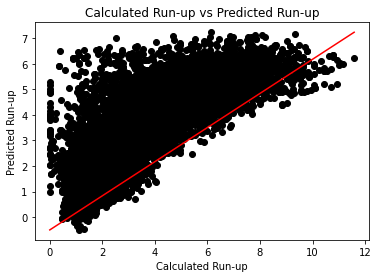

In [46]:
%matplotlib inline
#plot the tests and predictions
plt.scatter(test_target, prediction_of_test, color='black')
#draw a line through the middle showing the fit
x0 = min(testing['adim_R'])
x1 = max(testing['adim_R'])
y0 = min(prediction_of_test)
y1 = max(prediction_of_test)
plt.plot([x0,x1],[y0,y1], color='red')
plt.xlabel("Calculated Run-up")
plt.ylabel("Predicted Run-up")
plt.title("Calculated Run-up vs Predicted Run-up")
plt.show()